# PS4 (Secs 2.9-2.15): 2,3,7,8,11,13,14

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

# P4.2

In [2]:
A = me.ReferenceFrame('A')

In [3]:
x1, x2 = me.dynamicsymbols('x1:3')
y1, y2 = me.dynamicsymbols('y1:3')
z1, z2 = me.dynamicsymbols('z1:3')

In [4]:
L1, L2 = sm.symbols("L1:3")

In [5]:
f1, f2, f3, f4 = me.dynamicsymbols('f1:5')

In [6]:
p1 = x1*A.x + y1*A.y + z1*A.z
p2 = x2*A.x + y2*A.y + z2*A.z

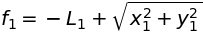

In [7]:
sm.Eq(f1, (p1 - p1.dot(A.z)*A.z).magnitude() - L1)

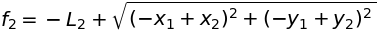

In [8]:
p2minp1 = p2 - p1
sm.Eq(f2, (p2minp1 - p2minp1.dot(A.z)*A.z).magnitude() - L2) 

In [9]:
sm.Eq(f3, p1.dot(A.z))

In [10]:
sm.Eq(f4, p2.dot(A.z))

# P4.3

It has the same number as P4.2 plus one additional one.

In [11]:
L3, L4 = sm.symbols('L3, L4')

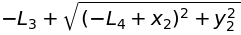

In [12]:
p2_Q = p2 - L4*A.x
(p2_Q - p2_Q.dot(A.z)*A.z).magnitude() - L3

# P4.7

(a) Each body has 6 coordinates but a ball and socket removes the need for translation coordinates for one body, so the total is 12-3=9.

(b) B has 6 and the rotor has 1 coordinate, so 7.

(c) B has 6 and the rotor's angular position is prescribed so this does not add a generalized coordinate. Total is 6.

(d) In 4.2 only 2 coordinate angles are needed.

(e) In 4.3 only 1 independent coordinate is needed, but you can get it down to 3 before introducing the two holonomic constraints.

# P4.8

In [13]:
R = sm.symbols('R')
q1, q2, q3, q4, q5 = me.dynamicsymbols('q1:6')
u1, u2, u3, u4, u5 = me.dynamicsymbols('u1:6')
A = me.ReferenceFrame('A')
Y = me.ReferenceFrame('Y')  # intermediate frame so that simple rotations can be used
B = me.ReferenceFrame('B')
C = me.ReferenceFrame('C')
Y.orient(A, 'Axis', (q1, A.z))
B.orient(Y, 'Axis', (sm.pi/2 - q2, Y.x))
C.orient(B, 'Axis', (q3, B.z))

In [14]:
O, P, Cs, Q = sm.symbols('O, P, Cs, Q', cls=me.Point)

In [15]:
P.set_pos(O, q4*A.x + q5*A.y)
Cs.set_pos(P, R*B.y)
O.set_vel(A, 0)
P.set_vel(A, P.pos_from(O).dt(A))
Cs.set_vel(A, Cs.pos_from(O).dt(A))

In [16]:
u1_eq = sm.Eq(u1, C.ang_vel_in(A).dot(B.x))
u2_eq = sm.Eq(u2, C.ang_vel_in(A).dot(B.y))
u3_eq = sm.Eq(u3, C.ang_vel_in(A).dot(B.z))
u4_eq = sm.Eq(u4, P.vel(A).dot(A.x))
u5_eq = sm.Eq(u5, P.vel(A).dot(A.y))

To be valid GS's these equations must be linear in the time derivatives of the q's and we must be able to uniquely solve for the time derivatives of the q's. Below I show that they can be solved:

In [17]:
sm.solve([u1_eq, u2_eq, u3_eq, u4_eq, u5_eq], q1.diff(), q2.diff(), q3.diff(), q4.diff(), q5.diff())

# P4.11

In [18]:
R, L = sm.symbols("R, L")
q1, q2, q3, q4, q5, q6 = me.dynamicsymbols('q1:7')
u1, u2, u3, u4, u5, u6 = me.dynamicsymbols('u1:7')

In [19]:
A, N, C1, S, C2 = sm.symbols('A, N, C_1, S, C_2', cls=me.ReferenceFrame)

Each of the bodies rotates about the axle. All rotations are relative to the yaw frame N.

In [20]:
N.orient(A, 'Axis', (q3, A.y))
C1.orient(N, 'Axis', (q4, N.z))
S.orient(N, 'Axis', (q5, N.z))
C2.orient(N, 'Axis', (q6, N.z))

In [21]:
O, Ss, C1s, C2s, C1p, C2p = sm.symbols('O, S*, C_1^*, C_2^*, C_1^p, C_2^p', cls=me.Point)

In [22]:
Ss.set_pos(O, q1*A.x + q2*A.z + R*N.y + L*S.z)

In [23]:
O.set_vel(A, 0)

In [24]:
Ss.set_vel(A, Ss.pos_from(O).dt(A))

In [25]:
Ss.vel(A).simplify()

In [26]:
S.ang_vel_in(A)

In [27]:
C1.ang_vel_in(A)

In [28]:
C2.ang_vel_in(A)

Make equations for each u:

In [29]:
u_eqs = [sm.Eq(u1, Ss.vel(A).dot(N.x)),
         sm.Eq(u2, S.ang_vel_in(A).dot(N.y)),
         sm.Eq(u3, S.ang_vel_in(A).dot(N.z)),
         sm.Eq(u4, C1.ang_vel_in(A).dot(N.z)),
         sm.Eq(u5, C2.ang_vel_in(A).dot(N.z)),
         sm.Eq(u6, Ss.vel(A).dot(N.z))]

In [30]:
u_eqs

In [31]:
qdots = sm.solve(u_eqs, *[q.diff() for q in (q1, q2, q3, q4, q5, q6)])
qdots

Redefine all of the velocities in terms of the u's.

In [32]:
Ss.set_vel(A, Ss.vel(A).simplify().subs(qdots))

In [33]:
C1.set_ang_vel(A, C1.ang_vel_in(A).subs(qdots))

In [34]:
C2.set_ang_vel(A, C2.ang_vel_in(A).subs(qdots))

Calculate the contact point velocities so motion constraints can be formed.

In [35]:
C1p.set_pos(Ss, -L*N.z - R*N.y)
C2p.set_pos(Ss, L*N.z - R*N.y)

In [36]:
A_v_C1p = C1p.v2pt_theory(Ss, A, C1).simplify()
A_v_C1p

In [37]:
A_v_C2p = C2p.v2pt_theory(Ss, A, C2).simplify()
A_v_C2p

Form the expressions that should equate to zero:

In [38]:
motion_con = [A_v_C1p.dot(N.x).simplify(),
              A_v_C1p.dot(N.z).simplify(),
              A_v_C2p.dot(N.x).simplify(),
              A_v_C2p.dot(N.z).simplify()]

Note that two constraints are redundant, so we can only solve for three dependent u's.

In [39]:
motion_con

In [40]:
dep_us = sm.solve(motion_con, u4, u5, u6)

In [41]:
dep_us

I use a list comprehension to calculate the A terms for each dependent u.

In [42]:
A4 = [dep_us[u4].diff(u) for u in (u1, u2, u3)]
A4

In [43]:
A5 = [dep_us[u5].diff(u) for u in (u1, u2, u3)]
A5

In [44]:
A6 = [dep_us[u6].diff(u) for u in (u1, u2, u3)]
A6

By inspection it is clear all the B terms would be zero.

# P4.13

Repeat from 4.8:

In [45]:
R = sm.symbols('R')
q1, q2, q3, q4, q5 = me.dynamicsymbols('q1:6')
u1, u2, u3, u4, u5 = me.dynamicsymbols('u1:6')
A = me.ReferenceFrame('A')
Y = me.ReferenceFrame('Y')  # intermediate frame so that simple rotations can be used
B = me.ReferenceFrame('B')
C = me.ReferenceFrame('C')
Y.orient(A, 'Axis', (q1, A.z))
B.orient(Y, 'Axis', (sm.pi/2 - q2, Y.x))
C.orient(B, 'Axis', (q3, B.z))
O, P, Cs, Ch = sm.symbols('O, P, Cs, Ch', cls=me.Point)
P.set_pos(O, q4*A.x + q5*A.y)
Cs.set_pos(P, R*B.y)
O.set_vel(A, 0)
P.set_vel(A, P.pos_from(O).dt(A))
Cs.set_vel(A, Cs.pos_from(O).dt(A))
Ch.set_pos(Cs, -R*B.y)
Ch.v2pt_theory(Cs, A, C)
u1_eq = sm.Eq(u1, C.ang_vel_in(A).dot(B.x))
u2_eq = sm.Eq(u2, C.ang_vel_in(A).dot(B.y))
u3_eq = sm.Eq(u3, C.ang_vel_in(A).dot(B.z))
u4_eq = sm.Eq(u4, P.vel(A).dot(A.x))
u5_eq = sm.Eq(u5, P.vel(A).dot(A.y))
qdots = sm.solve([u1_eq, u2_eq, u3_eq, u4_eq, u5_eq], q1.diff(), q2.diff(), q3.diff(), q4.diff(), q5.diff())

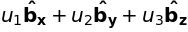

In [46]:
A_w_C = C.ang_vel_in(A).subs(qdots).express(B).simplify()
A_w_C

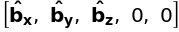

In [47]:
[A_w_C.diff(u, A) for u in (u1, u2, u3, u4, u5)]

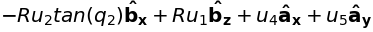

In [48]:
A_v_Cs = Cs.vel(A).subs(qdots).simplify()
A_v_Cs

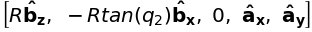

In [49]:
[A_v_Cs.diff(u, A) for u in (u1, u2, u3, u4, u5)]

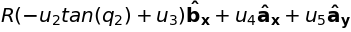

In [50]:
A_v_Ch = Ch.vel(A).subs(qdots).simplify()
A_v_Ch

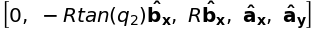

In [51]:
[A_v_Ch.diff(u, A) for u in (u1, u2, u3, u4, u5)]

# P4.14

In [52]:
motion_con = [A_v_Ch.dot(Y.x), A_v_Ch.dot(Y.y)]
motion_con

In [53]:
dep_us = sm.solve(motion_con, u4, u5)
dep_us

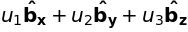

In [54]:
A_w_C.subs(dep_us)

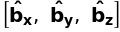

In [55]:
[A_w_C.subs(dep_us).diff(u, A) for u in (u1, u2, u3)]

In [56]:
A_v_Cs = A_v_Cs.subs(dep_us).express(B)
A_v_Cs

In [57]:
[A_v_Cs.diff(u, A).simplify() for u in (u1, u2, u3)]

In [58]:
A_v_Ch = A_v_Ch.subs(dep_us).express(B)
A_v_Ch

In [59]:
[A_v_Ch.diff(u, A).simplify() for u in (u1, u2, u3)]